In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

<h4>
League of Legends is a popular MOBA video game. Each match tends to last 25 ~ 30 minutes, but it not rare to last 40 ~ 50 minutes or even longer. There is also a certain amount of points you gain or lose from a match, which is not affected by the length of the game. However, each team also the decision to surrender the match if enough players vote to. Since matches last so long, and the outcome may not vary. When is it a good decision to vote to surrender?
<br> <br>
In other words, is a match of League of Legends decided in the first 15 minutes?
<br> <br>
The closest dataset, I was able to find, contains the statistics of the first 10 minutes of match along with the result, so here, I will be answering the question: Is a match of League of Legends decided in the first 10 minutes?
</h4>

In [2]:
data = pd.read_csv('high_diamond_ranked_10min.csv')

In [258]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


The data contains 20 features for each team, red and blue. In each match, only one team can win, so we can choose either feature, 'blueWins' or 'redWins' as the label to predict. Thus, we will be using 'blueWins' as the label to predict in our classifier.

<h1> EDA: </h1>

Let's take a look at what our data looks like. See if we can find anything interesting that could potentially make our model better.

,gameId
blueWins,
0,4949
1,4930


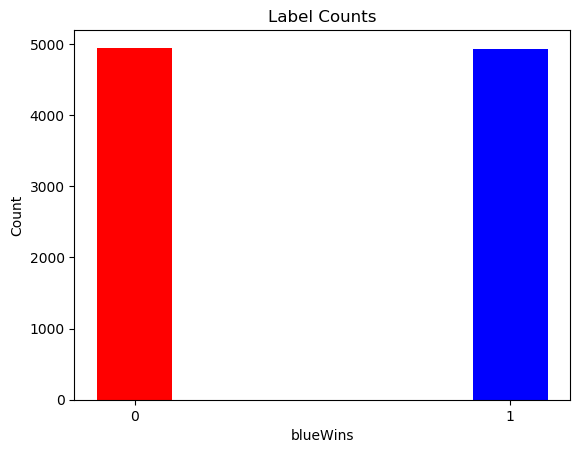

In [175]:
# Let's compare the number of labels
counts = data[['gameId', 'blueWins']].groupby('blueWins').count()

plt.bar([0,1], counts['gameId'], .2, color=['red', 'blue'])
plt.xticks([0,1])
plt.title('Label Counts')
plt.xlabel('blueWins')
plt.ylabel('Count')
counts

The number of samples of each label seems to be the same. Accuracy looks to be a good metric.

Next, I want to see the correlation between the label and some features that would follow my intuition by summarizing the data and plotting as well as examining the correlation coefficient. If the data seems to show a linear distribution, I will calculate the pearson correlation coefficient otherwise I will use spearmean's  correlation coefficient. 

Getting a kill in a game allows the team to earn extra gold as well as prevent the other team from earning gold. The more kills a team gets, the more likely they would be to win the match.

(0.9728971453336901, -0.866777425241744)

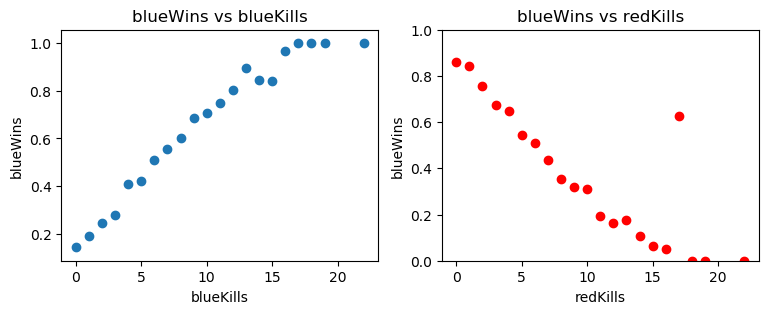

In [245]:
plt.figure(figsize=(9,3))

red = 'redKills'
blue = 'blueKills'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'])
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = pearsonr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red')
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = pearsonr(x.index, x['blueWins'])[0]

r1,r2

While kills are likely to occur in a match, it is does not gurantee anything. Towers are objects that must be destroyed in order to win the game. The more towers that are destroyed, the close you are to reaching the enemies 'nexus', which is the 
objective to destroy in order to win the game. Thus, I expect to see a strong positive correlation with the number of towers destroyed and the the team winning.

(0.9746794344808964, -0.5)

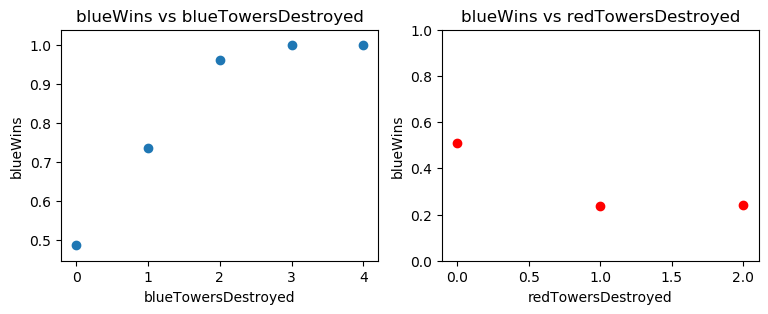

In [244]:
plt.figure(figsize=(9,3))

red = 'redTowersDestroyed'
blue = 'blueTowersDestroyed'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'])
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red')
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = spearmanr(x.index, x['blueWins'])[0]

r1,r2

Wards is an object that gives you 'vision' of an area for a period of time. 'Vision' is a very important concept in the match, but it is also very complicated. Having more wards doesnt exactly mean you have more vision, because they could be poorly placed, or destroyed quickly. Sometimes, even with vision, the information given from it may not be taken advantage of, thus wasted. I would expect it to have some positive correlation, but not very strong.

(-0.08087632200375632, -0.09883407143241872)

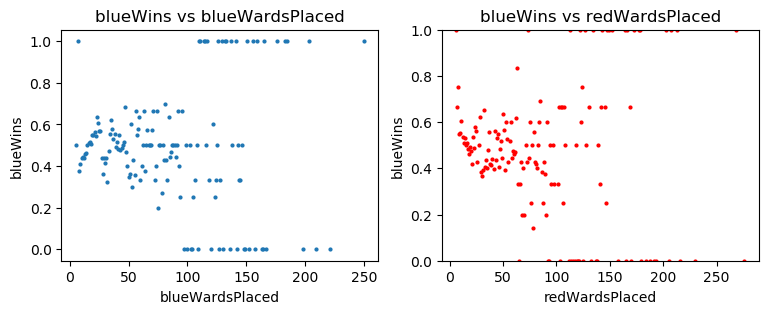

In [288]:
plt.figure(figsize=(9,3))

red = 'redWardsPlaced'
blue = 'blueWardsPlaced'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = spearmanr(x.index, x['blueWins'])[0]

r1,r2

An average match would contain ~20 wards placed. To see the numbers shown in the data would be ridiculous in a 10 minute match. Since so many values seem incorrect, I will treat them like null values, and because there are so many null values, I will drop these columns.

In each match, there are 'minions' that are computer controlled enemies for the player to kill. By killing these enemies, the player will gain 'experience' and 'gold', the two ways in order to become stronger. A big part of winning a match is by becoming stronger than the enemy players. I would expect the winning team to have slightly more of these.

((0.8559564330337908, -0.8677892971967823),
 (0.7766071697031529, -0.6956475570500243))

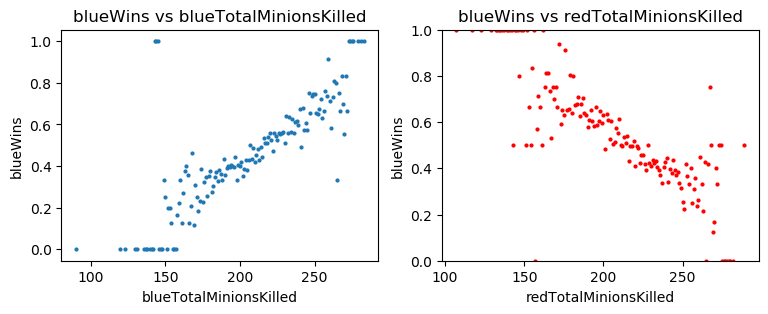

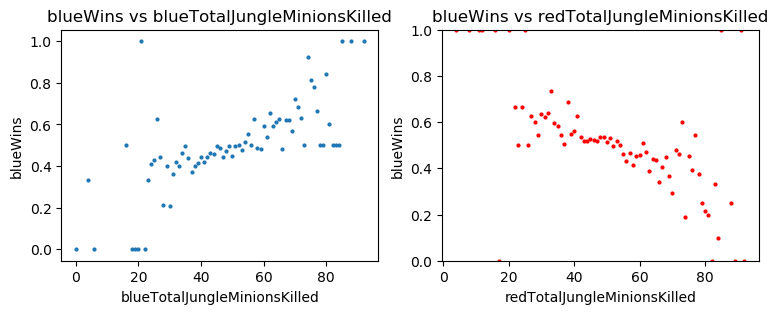

In [289]:
plt.figure(figsize=(9,3))

red = 'redTotalMinionsKilled'
blue = 'blueTotalMinionsKilled'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = spearmanr(x.index, x['blueWins'])[0]

plt.figure(figsize=(9,3))

red = 'redTotalJungleMinionsKilled'
blue = 'blueTotalJungleMinionsKilled'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r3 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r4 = spearmanr(x.index, x['blueWins'])[0]

(r1,r2), (r3,r4)

Knowing the totals doesn't really tell us much. We want to know the totals relative to each team. The difference in these values should be able to give us a better idea. Let's see.

((0.9067434031070193, -0.9067434031070193),
 (0.8638348829248566, -0.8638348829248566))

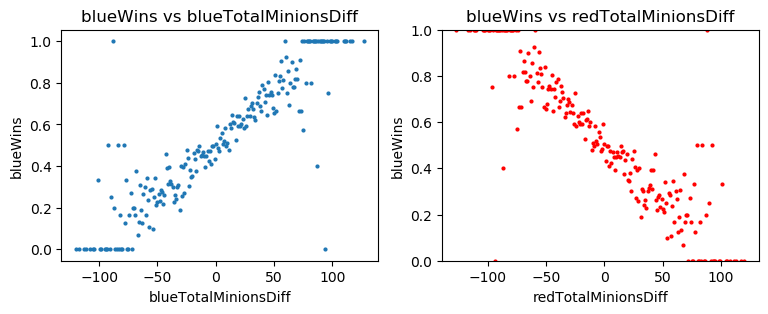

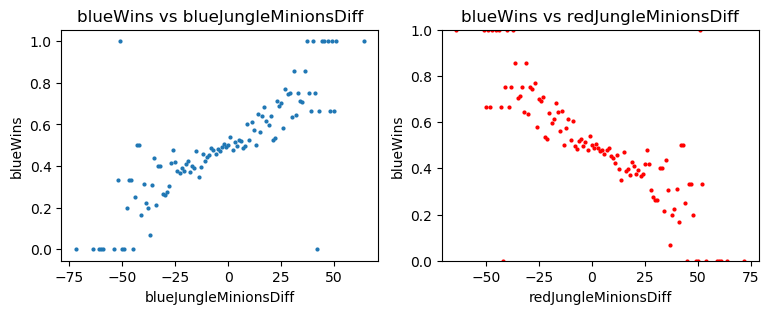

In [299]:
plt.figure(figsize=(9,3))

data['blueTotalMinionsDiff'] = data['blueTotalMinionsKilled'] - data['redTotalMinionsKilled']
data['redTotalMinionsDiff'] = data['redTotalMinionsKilled'] - data['blueTotalMinionsKilled']

blue = 'blueTotalMinionsDiff'
red = 'redTotalMinionsDiff'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = spearmanr(x.index, x['blueWins'])[0]

plt.figure(figsize=(9,3))

data['blueJungleMinionsDiff'] = data['blueTotalJungleMinionsKilled'] - data['redTotalJungleMinionsKilled']
data['redJungleMinionsDiff'] = data['redTotalJungleMinionsKilled'] - data['blueTotalJungleMinionsKilled']

blue = 'blueJungleMinionsDiff'
red = 'redJungleMinionsDiff'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r3 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r4 = spearmanr(x.index, x['blueWins'])[0]

(r1, r2), (r3, r4)

There are other monsters known as 'EpicMonsters' that are similar to 'minions', but there are many minions and they are easy to kill. On the other hand, 'EpicMonsters' are difficult to kill, and both teams compete to kill these monsters as they will grant their own unique bonuses to the entire team. In the first 10 matches, there are two 'EpicMonsters' called the 'Rift Herald' and 'Dragon'. As you would expect, the more 'EpicMonsters' a team manages to slay, the more powerful the team would be.

((0.9999999999999999, -0.9999999999999999),
 (0.9999999999999999, -0.9999999999999999))

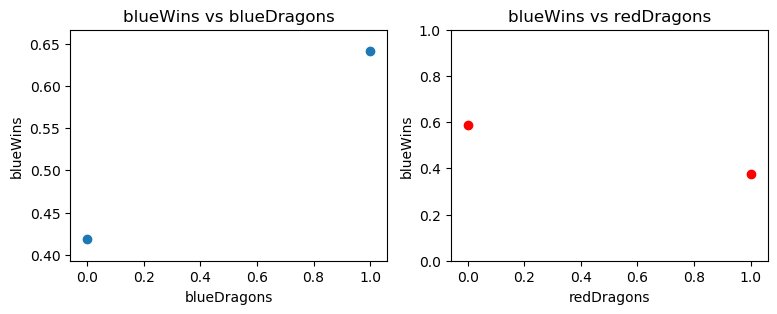

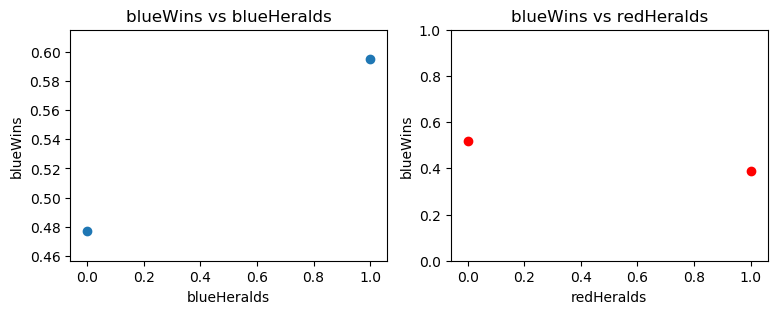

In [267]:
plt.figure(figsize=(9,3))

red = 'redDragons'
blue = 'blueDragons'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'])
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red')
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = spearmanr(x.index, x['blueWins'])[0]

plt.figure(figsize=(9,3))

red = 'redHeralds'
blue = 'blueHeralds'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'])
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r3 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red')
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r4 = spearmanr(x.index, x['blueWins'])[0]

(r1,r2), (r3,r4)

It is impossible to slay more than 1 of each EpicMonster within the first 10 minutes, because they take time to spawn. Thus, knowing whether a team slayed it, will also tell you whether the other team slayed it, so we can drop a couple of columns.

Anything that is killed or destroyed will give the team gold and experience. A summarization of all previous ideas could be shown in the totals of gold and experiences.

((0.5800458349161397, -0.5756553836026276),
 (0.5979787437025628, -0.5897892413668959))

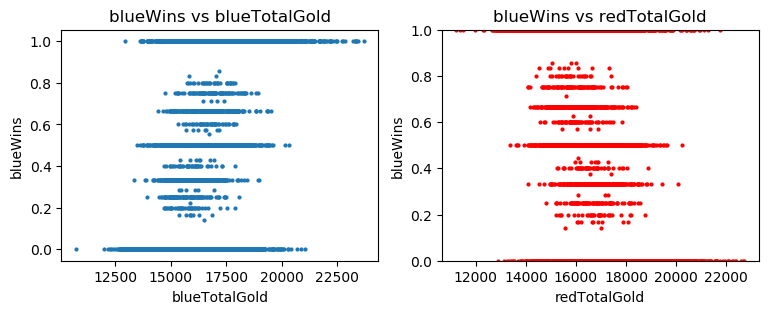

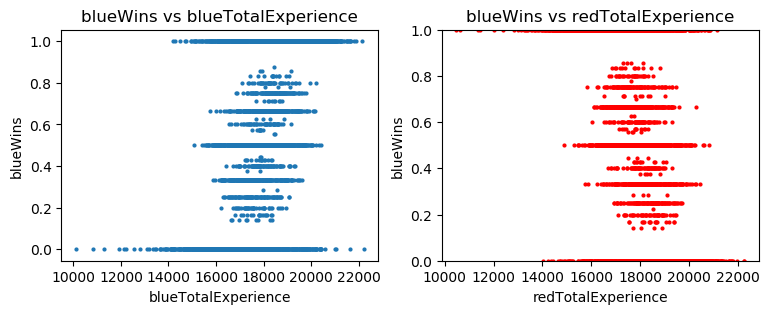

In [290]:
plt.figure(figsize=(9,3))

red = 'redTotalGold'
blue = 'blueTotalGold'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = spearmanr(x.index, x['blueWins'])[0]

plt.figure(figsize=(9,3))

red = 'redTotalExperience'
blue = 'blueTotalExperience'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r3 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r4 = spearmanr(x.index, x['blueWins'])[0]

(r1,r2), (r3,r4)

These plots show the totals of a team, but that is not what would decide a match. It is how much stronger a team is over the other. Thus, the difference in totals between the teams.

((0.6459792280968069, -0.6459792280968069),
 (0.6347586184424125, -0.6347586184424125))

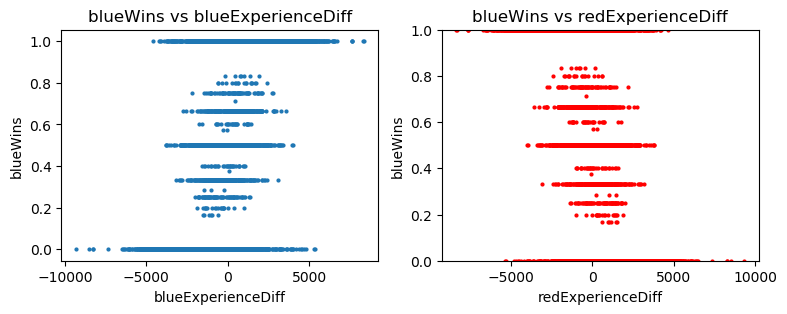

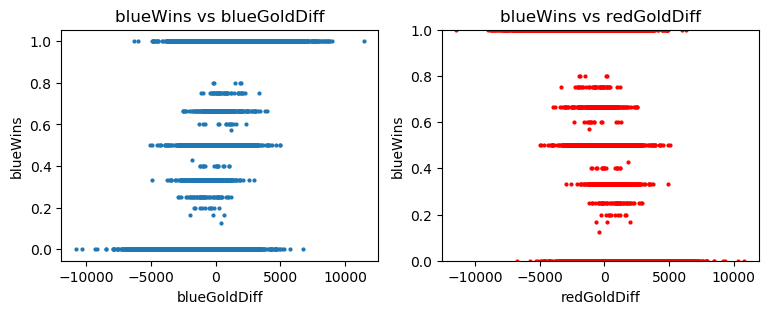

In [292]:
plt.figure(figsize=(9,3))

red = 'redExperienceDiff'
blue = 'blueExperienceDiff'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r1 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r2 = spearmanr(x.index, x['blueWins'])[0]

plt.figure(figsize=(9,3))

red = 'redGoldDiff'
blue = 'blueGoldDiff'

x = data[[blue, 'blueWins']].groupby(blue).mean()
plt.subplot(121)
plt.scatter(x.index, x['blueWins'], s= 4)
plt.ylabel('blueWins')
plt.xlabel(blue)
plt.title('blueWins vs ' + blue)

r3 = spearmanr(x.index, x['blueWins'])[0]

x = data[[red, 'blueWins']].groupby(red).mean()
plt.subplot(122)
plt.scatter(x.index, x['blueWins'], color='red', s= 4)
plt.ylabel('blueWins')
plt.xlabel(red)
plt.ylim(0,1)
plt.title('blueWins vs ' + red)

r4 = spearmanr(x.index, x['blueWins'])[0]

(r1,r2), (r3,r4)

I would of expected that the experience and gold difference to correlate with the probability of winning the game, but it seems not.

Here's a summary of the correlations between each feature.

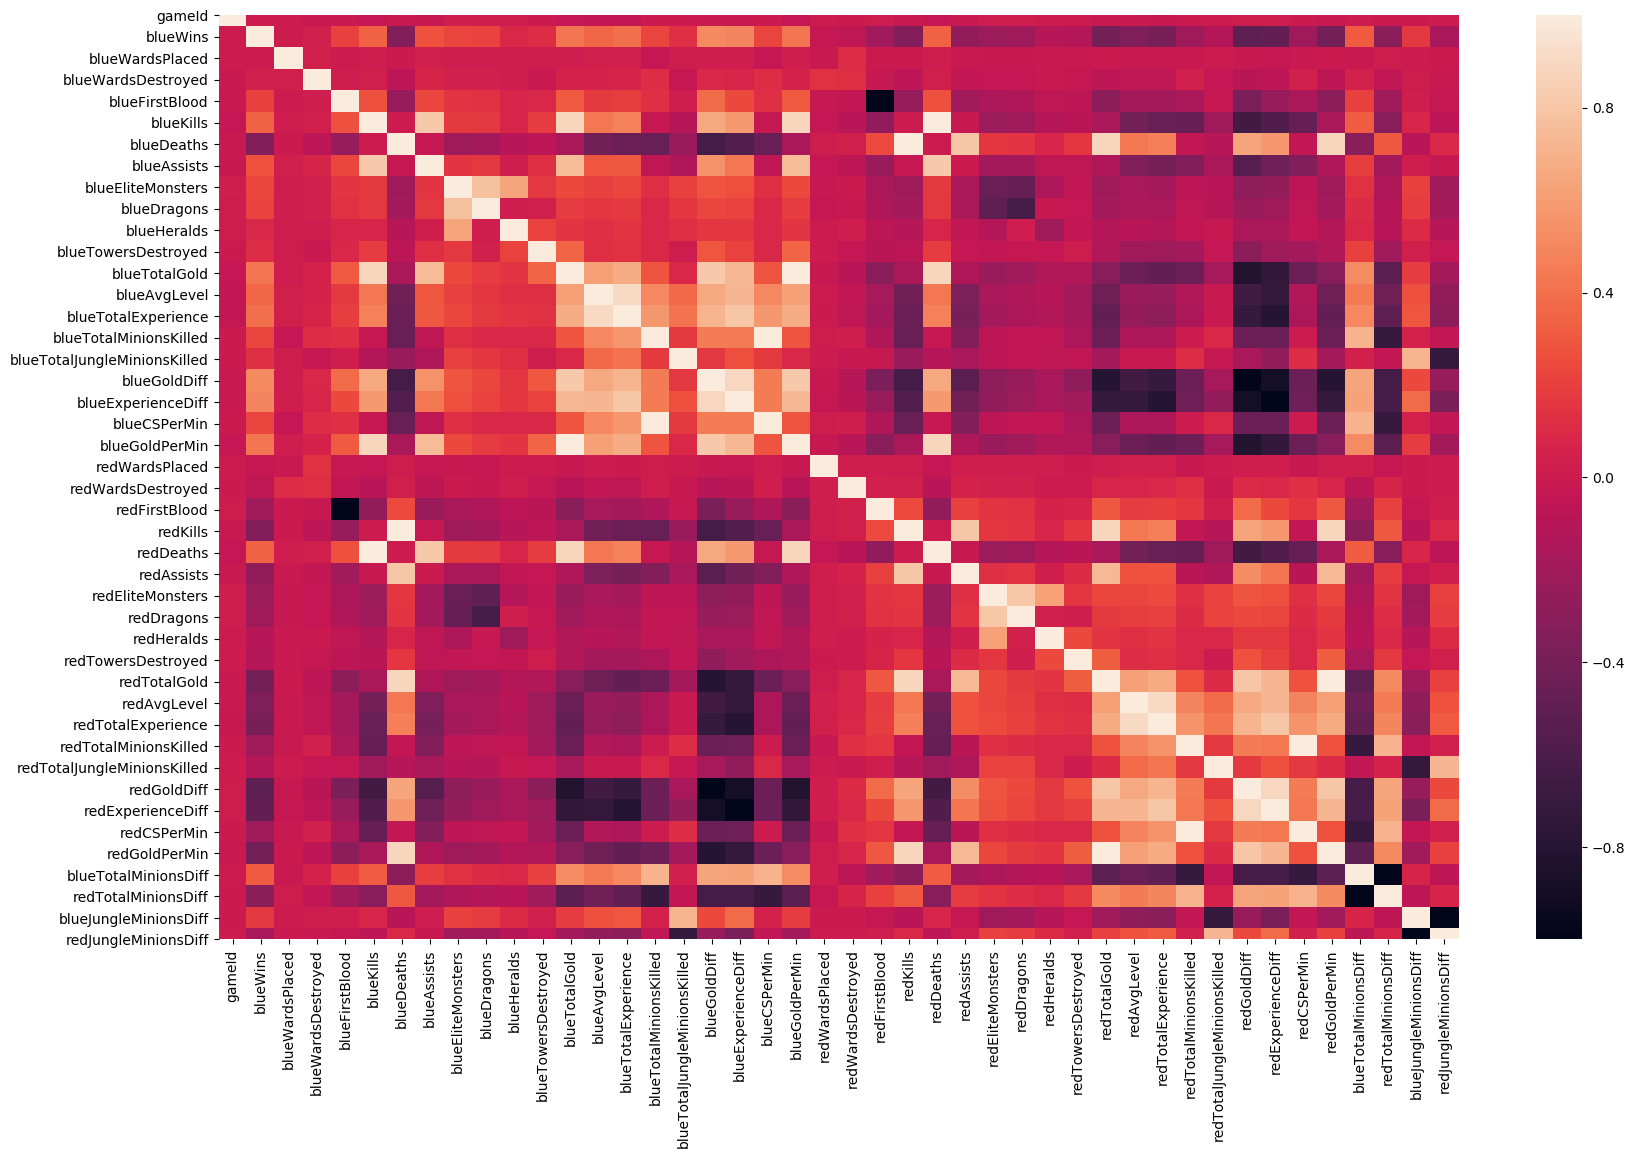

In [326]:
import seaborn as sn

plt.figure(figsize=(20, 12))

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

<h1> Feature Selection: </h1>

Through EDA and my understanding of the game, there would be a few columns that I think should be dropped.

<h1> Preprocessing: </h1>

In [408]:
data = pd.read_csv('high_diamond_ranked_10min.csv')
scaled_data = data.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in data.drop(columns=['gameId', 'blueWins']):
    scaled_data[col] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))

data = scaled_data


<h1> Model Selection: </h1>

Here, we are interesting in finding and choosing the model with the best accuracy.

To start, let's see the results of a few classifiers on the data without any changes.

In [409]:
X = data.drop(columns = ['blueWins'])
y = data['blueWins']

In [410]:
# Lets try RandomForest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7281096704760929

In [411]:
# Lets try GNB
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.4931678880746169

Now, let's try to improve the accuracy by manipulating data based on my understanding of the game and the results from EDA.

In [412]:
columns_to_drop = ['redFirstBlood', 'redTotalGold', 'blueTotalGold', 'blueGoldDiff', 'redTotalMinionsKilled',
                   'blueTotalMinionsKilled', 'redGoldPerMin', 'blueGoldPerMin', 'blueEliteMonsters',
                   'redEliteMonsters', 'blueExperienceDiff', 'redTotalExperience', 'blueTotalExperience',
                   'gameId','blueWardsPlaced', 'blueWardsDestroyed','redWardsPlaced','redWardsDestroyed',
                   'blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled',
                   #'redCSPerMin', 'blueCSPerMin',
                   'blueWardsDestroyed', 'redWardsDestroyed'
                  ]

#columns_to_drop = ['gameId']

data_dropped = data.drop(columns = columns_to_drop)
X = data_dropped.drop(columns = ['blueWins'])
y = data_dropped['blueWins']

data_dropped.columns

Index(['blueWins', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueAvgLevel',
       'blueCSPerMin', 'redKills', 'redDeaths', 'redAssists', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redAvgLevel', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin'],
      dtype='object')

In [413]:
# Lets try RandomForest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7297292574181314

In [414]:
# Lets try AdaBoost
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.726489468559422

In [415]:
#Lets try GradientBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7265903243991185

In [416]:
# Lets try GNB
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7232512683851791

In [417]:
# Let's try bagging with KNN
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
scores = cross_val_score(bagging, X, y, cv=5)
scores.mean()

0.716670168605545

In [418]:
# Let's try logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
scores = cross_val_score(bagging, X, y, cv=5)
scores.mean()

0.7146456721160253

In [421]:
# Let's try LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(bagging, X, y, cv=5)
scores.mean()

0.7191013170706708

In [424]:
# Let's try GPC
from sklearn.gaussian_process import GaussianProcessClassifier

clf = GaussianProcessClassifier(random_state=0)
scores = cross_val_score(bagging, X, y, cv=5)
scores.mean()

0.713431712191872

In [426]:
# Let's try Neural Networks
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300)
scores = cross_val_score(bagging, X, y, cv=5)
scores.mean()

0.7171772664377594

Hyper Parameter Tuning:

In [422]:
from sklearn.model_selection import GridSearchCV

In [435]:
parameters = {'n_estimators': [5,10,80,100,200],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [2,4,8],
             'max_features': ['sqrt', 'log2', None],
             'warm_start': [False, True], 
             }

rfc = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=100)
clf = GridSearchCV(rfc, parameters)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

C:\Users\Steven\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Steven\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Steven\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Steven\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING,

0.7290204991544098

In [429]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}